# Exercise 12.1
## Weights and activations of a convolutional network
This task consists of two parts. First, set up and evaluate a
convolutional neural network.
 1. Set up and train a convolutional network on the classification of images (data set CIFAR-10). Train your network to at least 70% test accuracy.
  - Plot the confusion matrix. What do you observe?
  - Plot several falsely classified images along with the predicted class scores. What kinds of misclassification do you observe, why do they occur?
 2. Plot the filter weights in the first layer of your network and see if you can make any sense of it.
 3. Visualize the activations in the first two layers of your network for two input images of choice and describe what you see.
  - Does it meet your expectations?


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

layers = keras.layers


keras version 2.4.0


### Download CIFAR-10 data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train = (x_train - 128.) / 128.
x_test = (x_test - 128.) / 128.

In [4]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

### Design, train, and evaluate a simple CNN

In [5]:
model = keras.models.Sequential([
    layers.Convolution2D(16, kernel_size=(5, 5), padding="same", activation='elu', input_shape=(32, 32, 3)),
    layers.Convolution2D(16, kernel_size=(3, 3), padding="same", activation='elu'),
    layers.Convolution2D(32, kernel_size=(3, 3), padding="same", strides=(2, 2), activation='elu'),
    layers.Convolution2D(32, kernel_size=(3, 3), padding="same", activation='elu'),
    layers.Convolution2D(64, kernel_size=(3, 3), padding="same", strides=(2, 2), activation='elu'),
    layers.Convolution2D(64, kernel_size=(3, 3), padding="same", activation='elu'),
    layers.GlobalMaxPooling2D(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
    ])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0

In [6]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(1e-3),
    metrics=['accuracy'])

results = model.fit(x_train, y_train_one_hot,
                    batch_size=32,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1,
                    callbacks = [keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, verbose=1, min_lr=1e-5)],
                    )

Epoch 1/30
1407/1407 [==============================] - 12s 6ms/step - loss: 1.8360 - accuracy: 0.3233 - val_loss: 1.5533 - val_accuracy: 0.4298
Epoch 2/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6050 - accuracy: 0.4152 - val_loss: 1.4613 - val_accuracy: 0.4790
Epoch 3/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5268 - accuracy: 0.4452 - val_loss: 1.3447 - val_accuracy: 0.5208
Epoch 4/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4726 - accuracy: 0.4673 - val_loss: 1.2960 - val_accuracy: 0.5354
Epoch 5/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4288 - accuracy: 0.4818 - val_loss: 1.2554 - val_accuracy: 0.5398
Epoch 6/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3708 - accuracy: 0.5032 - val_loss: 1.2058 - val_accuracy: 0.5622
Epoch 7/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3235 - accuracy: 0.5223 - val_loss: 1.1836 - val_accuracy

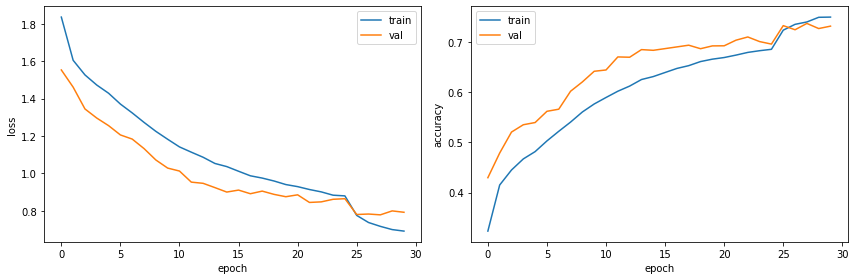

In [7]:
plt.figure(1, (12, 4))
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()

### Plot predictions
#### Task
Investigate the predictions of the trained model.

In [8]:
def plot_prediction(X, Y, Y_predict, fname=False):
    """
    Plot image X along with predicted probabilities Y_predict.
    X: CIFAR image, shape = (32, 32, 3)
    Y: CIFAR label, one-hot encoded, shape = (10)
    Y_predict: predicted probabilities, shape = (10)
    """
    X = 128 * X + 128
    labels = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                       'dog', 'frog', 'horse', 'ship', 'truck'])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    # plot image
    ax1.imshow(X.astype('uint8'), origin='upper')
    ax1.set(xticks=[], yticks=[])

    # plot probabilities
    ax2.barh(np.arange(10), Y_predict, align='center')
    ax2.set(xlim=(0, 1), xlabel='Score', yticks=[])

    for i in range(10):
        c = 'red' if (i == np.argmax(Y)) else 'black'
        ax2.text(0.05, i, labels[i].capitalize(), ha='left', va='center', color=c)


### Plot confusion matrix
#### Task
Plot the confusion matrix and comment on your findings

### Plot filter weights of the first layer

### Plot activations in convolutional layers
#### Task
Visualize the filters in the first convolutional layer of your CNN.

#### Task
Visualize the activations in the first two layers of your network for two input images of choice and describe what you see.